Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error


Load the dataset

In [ ]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Data Exploration

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

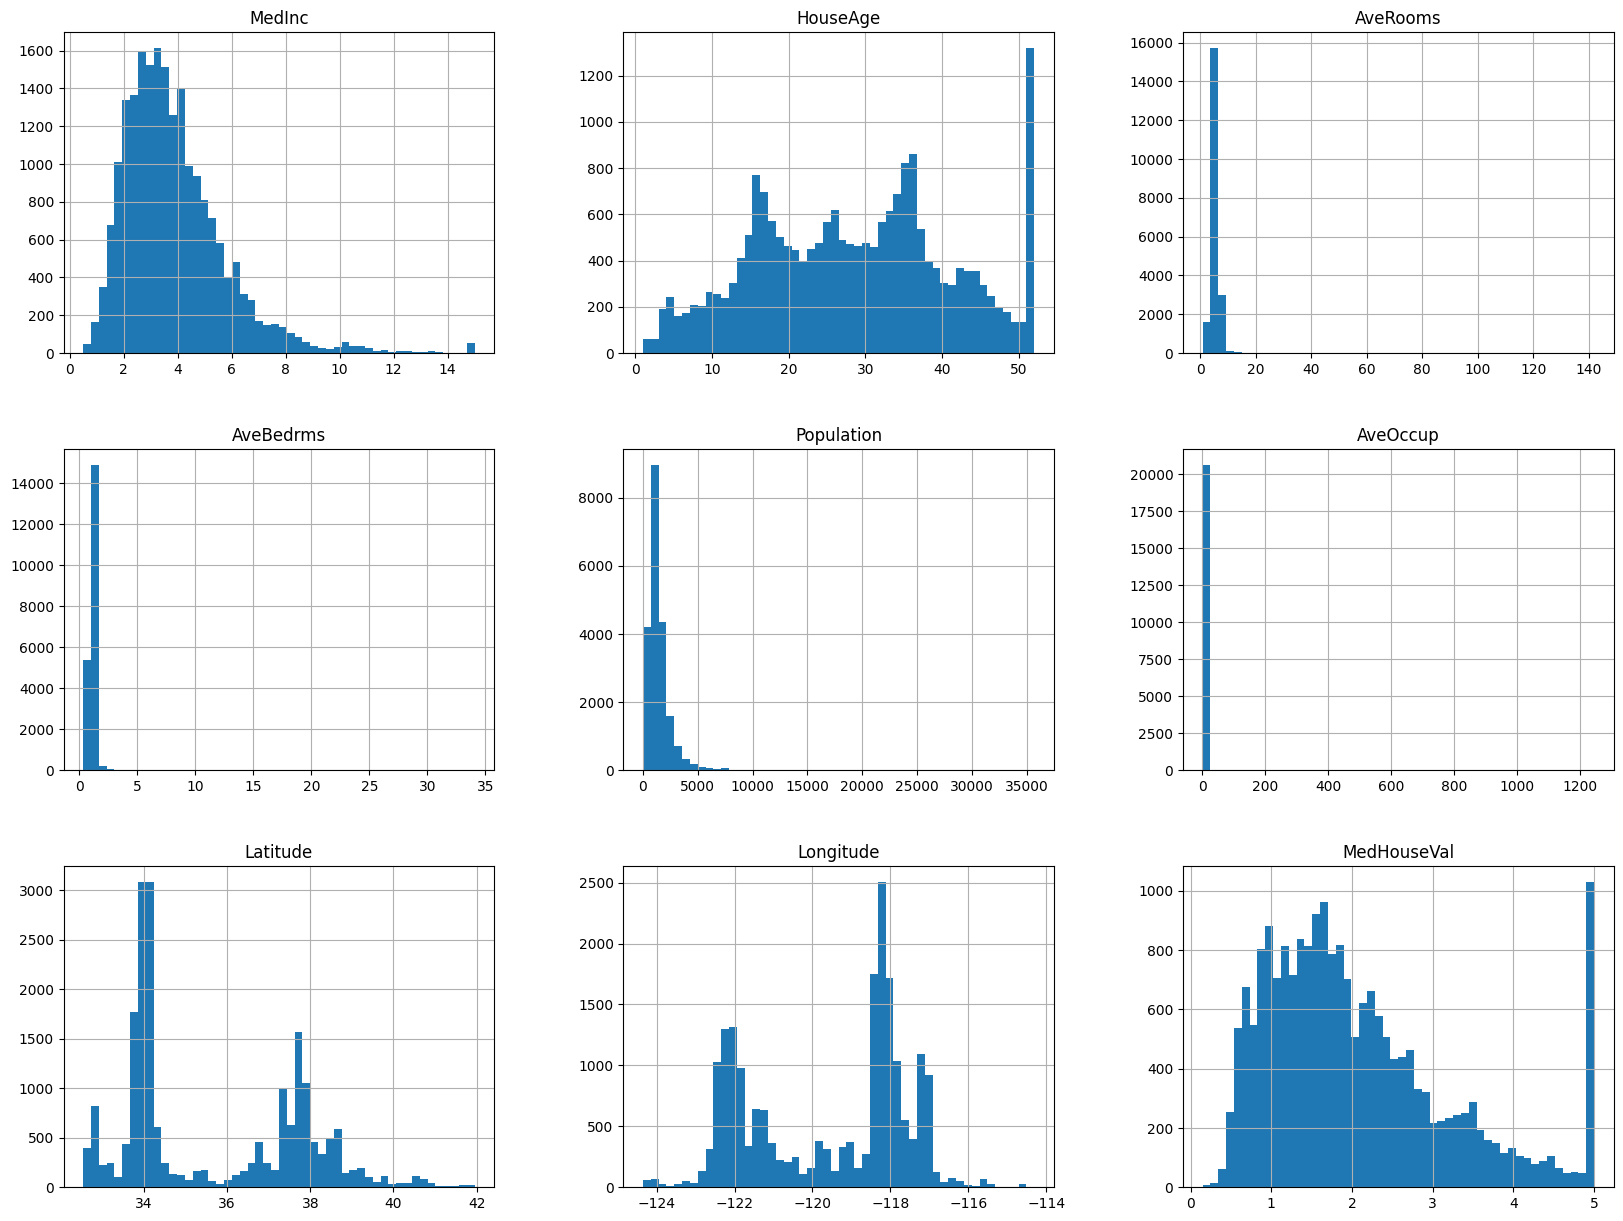

In [ ]:
# Summary statistics
print(df.describe())

# Check for missing values
df.isnull().sum()

# Visualize distributions
df.hist(bins=50, figsize=(20,15))
plt.show()


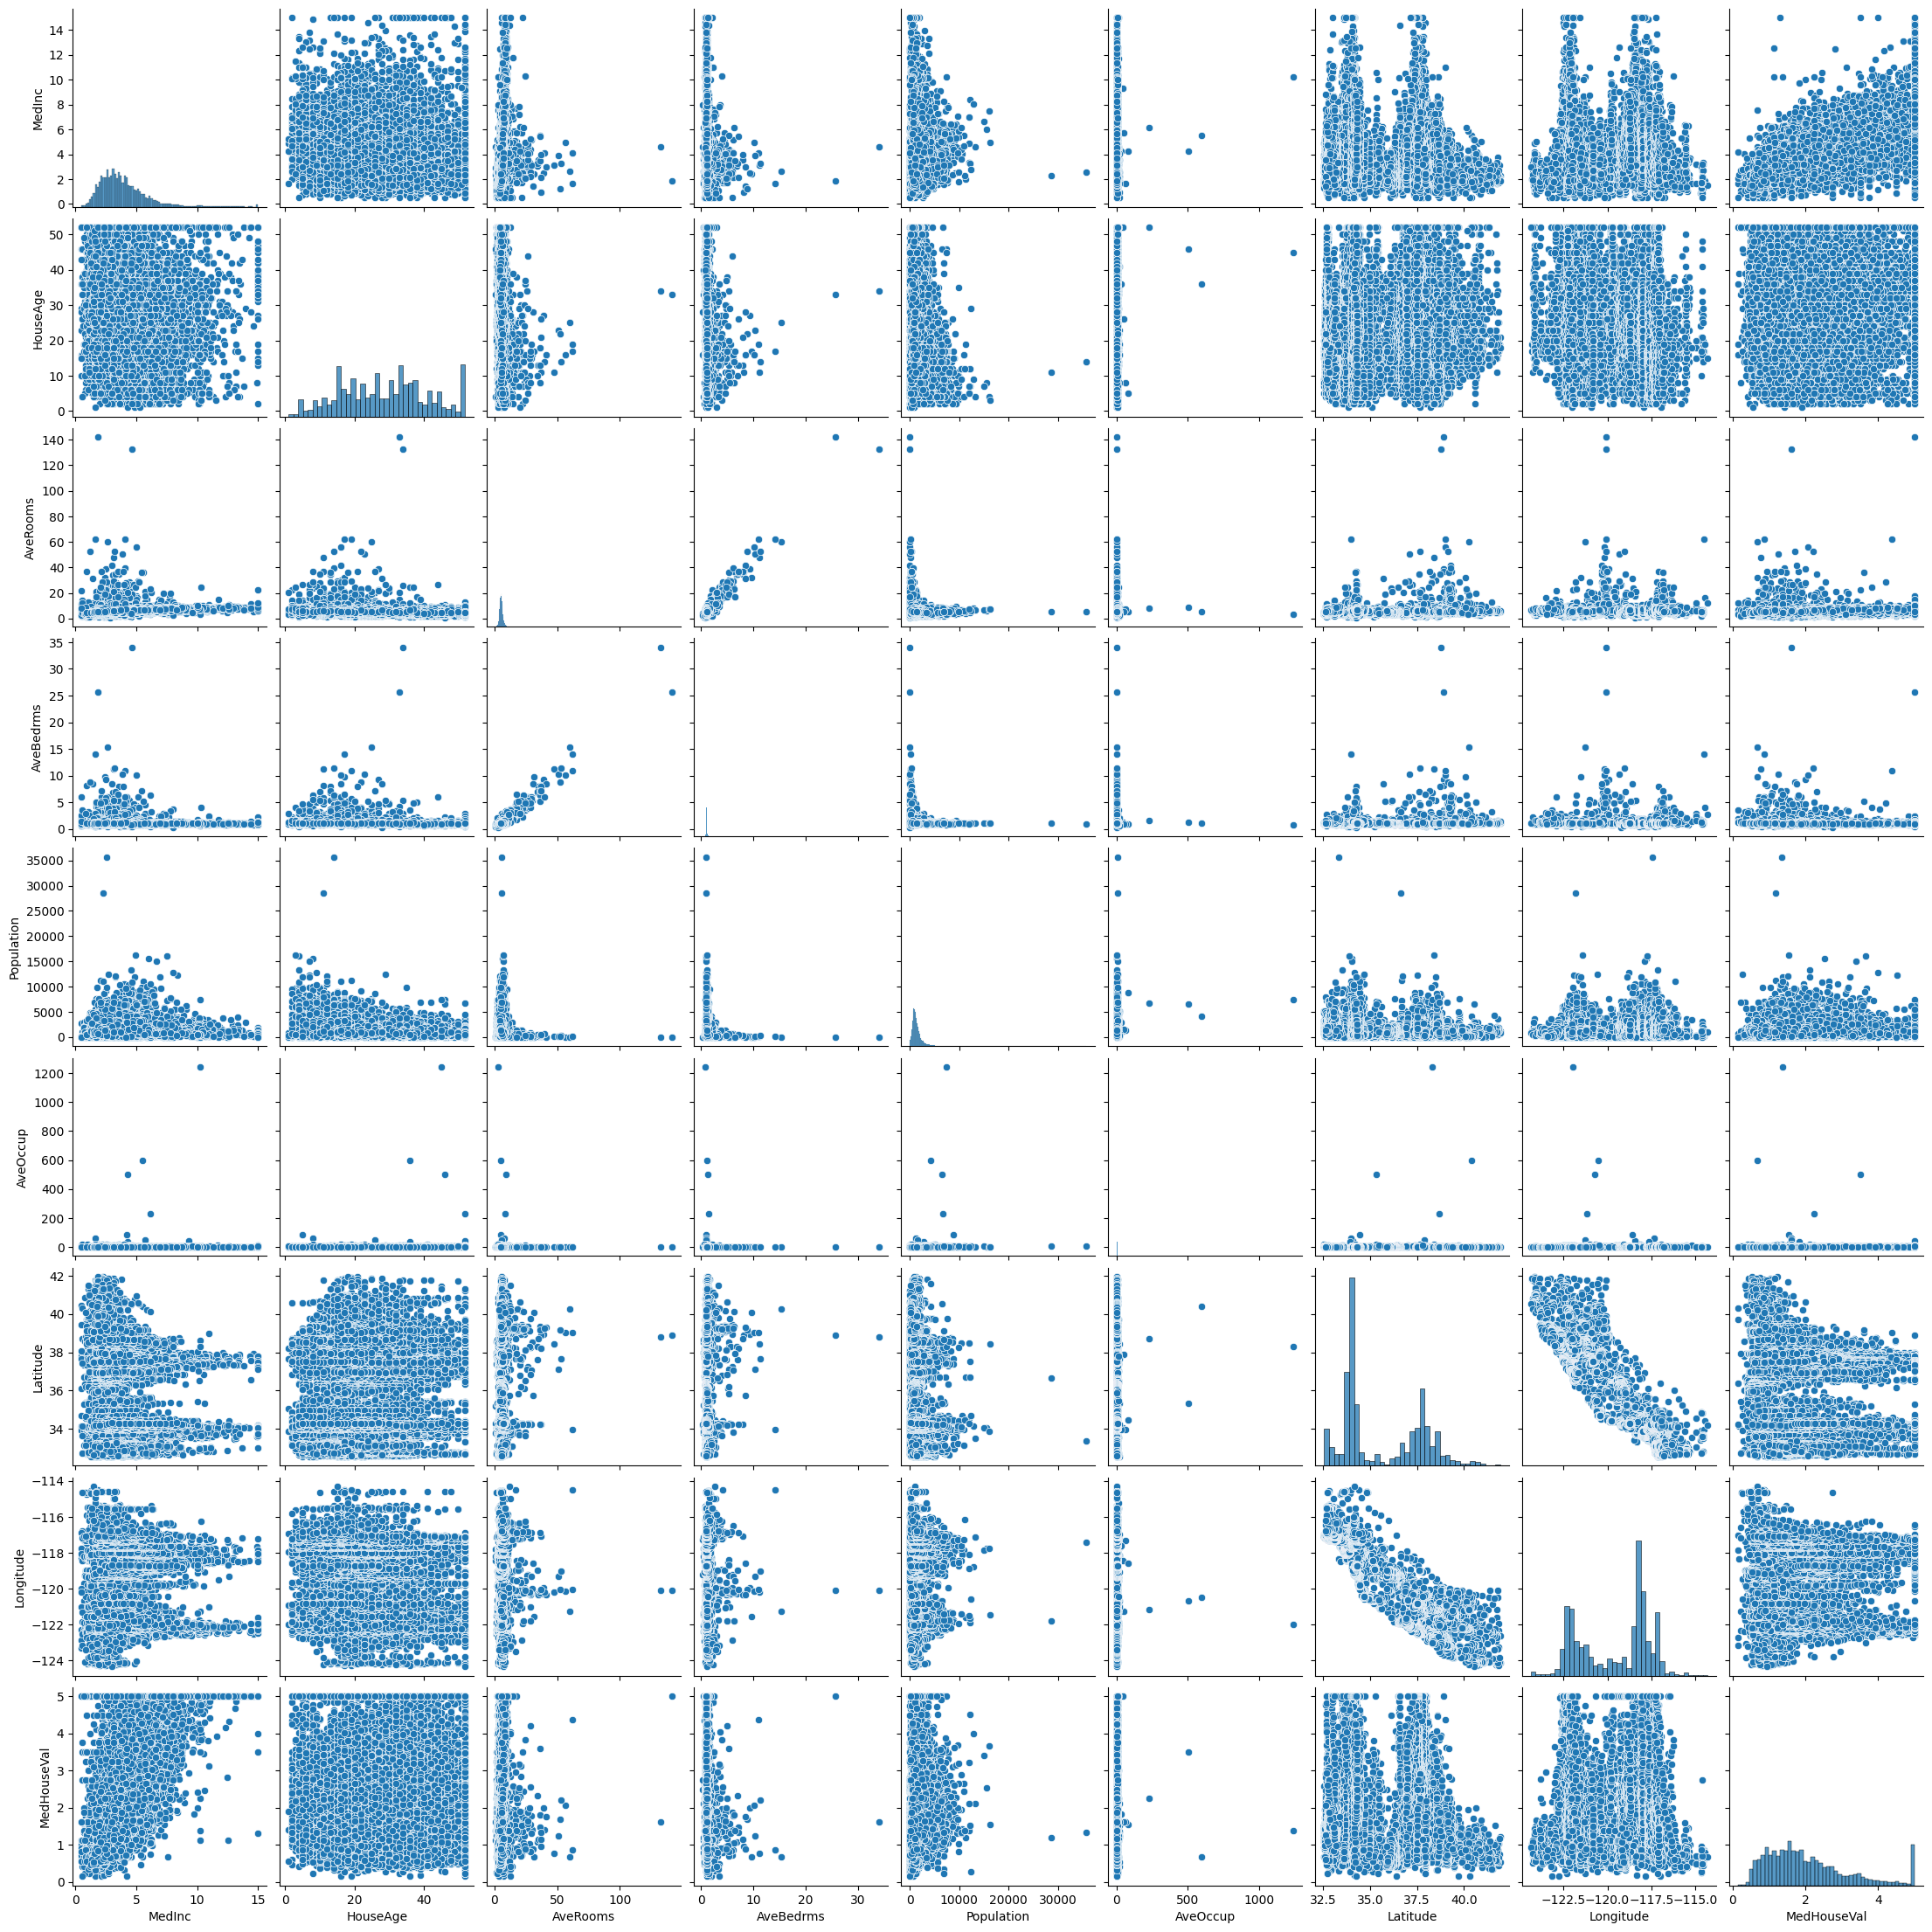

In [ ]:
sns.pairplot(df)

Visualize Relationships

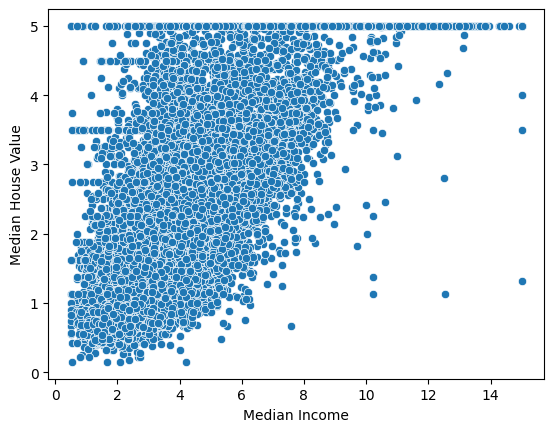

In [ ]:
# Scatter plot of key features
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


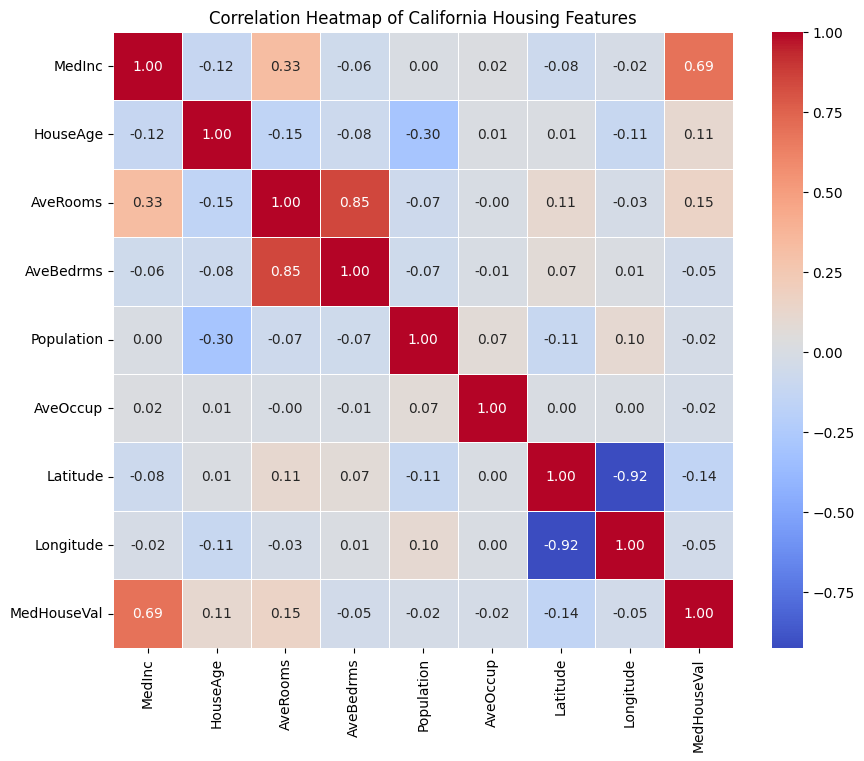

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of California Housing Features')
plt.show()


Data Preparation

In [ ]:
# Split data into training and testing sets
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Transform the data
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared = preprocessing_pipeline.transform(X_test)


Model Selection and Training

In [ ]:
# Train a Random Forest and Linear Regression model with cross-validation
lin_reg = LinearRegression()
forest_reg = RandomForestRegressor()

# Evaluate using cross-validation
lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=5)
forest_scores = cross_val_score(forest_reg, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=5)

lin_rmse_scores = np.sqrt(-lin_scores)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Linear Regression RMSE:", lin_rmse_scores.mean())
print("Random Forest RMSE:", forest_rmse_scores.mean())


Linear Regression RMSE: 0.7205271873526421
Random Forest RMSE: 0.5114713489290093


Fine-Tune the Model

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = [
    {'n_estimators': [50, 100, 150], 'max_features': [4, 6, 8]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_features': 4, 'n_estimators': 150}


Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Final RMSE on Test Set: 0.4945048792904458


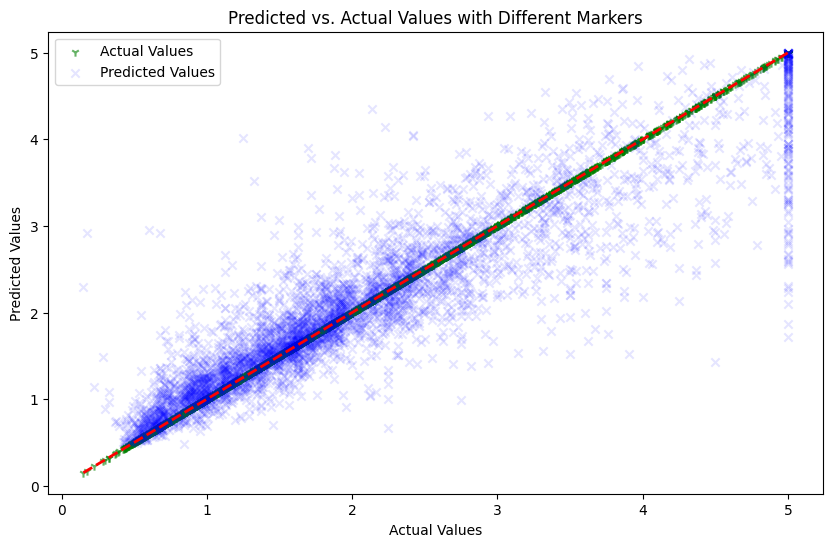

In [ ]:

# Evaluate final model on test set
final_model = grid_search.best_estimator_

y_test_pred = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Final RMSE on Test Set:", final_rmse)

# Visualize predictions vs actual values with different marker styles
plt.figure(figsize=(10, 6))

# Plot actual values (green circles along the y=x line)
plt.scatter(y_test, y_test, color='green', alpha=0.6, label='Actual Values', marker='1')

# Plot predicted values (blue crosses against actual values)
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.1, label='Predicted Values', marker='x')

# Plot the ideal y=x line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values with Different Markers")
plt.legend()
plt.show()


Feature Importance Plot \\
Feature importance in Random Forest helps understand which features have the most impact on predictions.

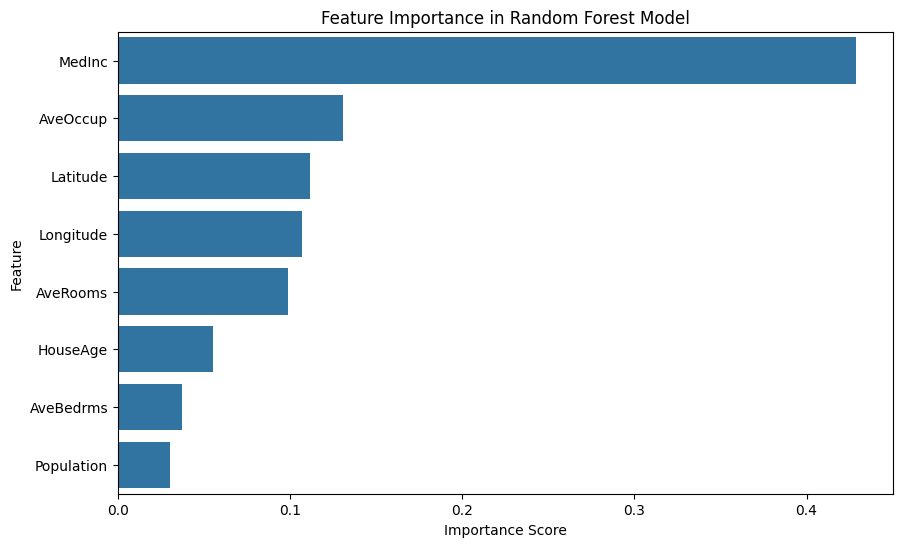

In [ ]:
# Extract feature importances from the best estimator in the grid search
feature_importances = final_model.feature_importances_
features = X.columns

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Residual Plot\\
A residual plot helps to assess the model’s accuracy by plotting the difference between actual and predicted values. If the residuals are evenly distributed around zero, it indicates a well-fitted model.



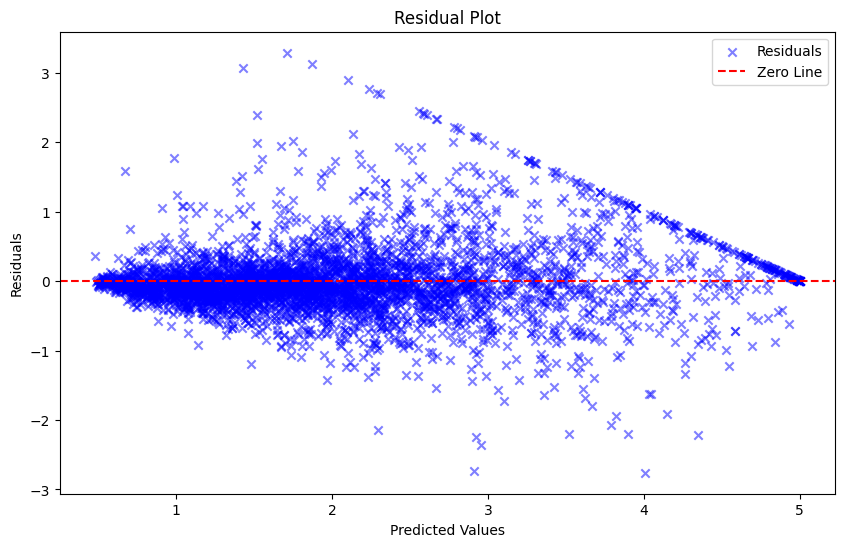

In [ ]:
# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals with different marker style for predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of residuals with predicted values on x-axis
plt.scatter(y_test_pred, residuals, alpha=0.5, color='blue', marker='x', label='Residuals')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

# Add labels and title
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Add a legend
plt.legend()

# Show the plot
plt.show()


RMSE and MAE at different hyperparameter value

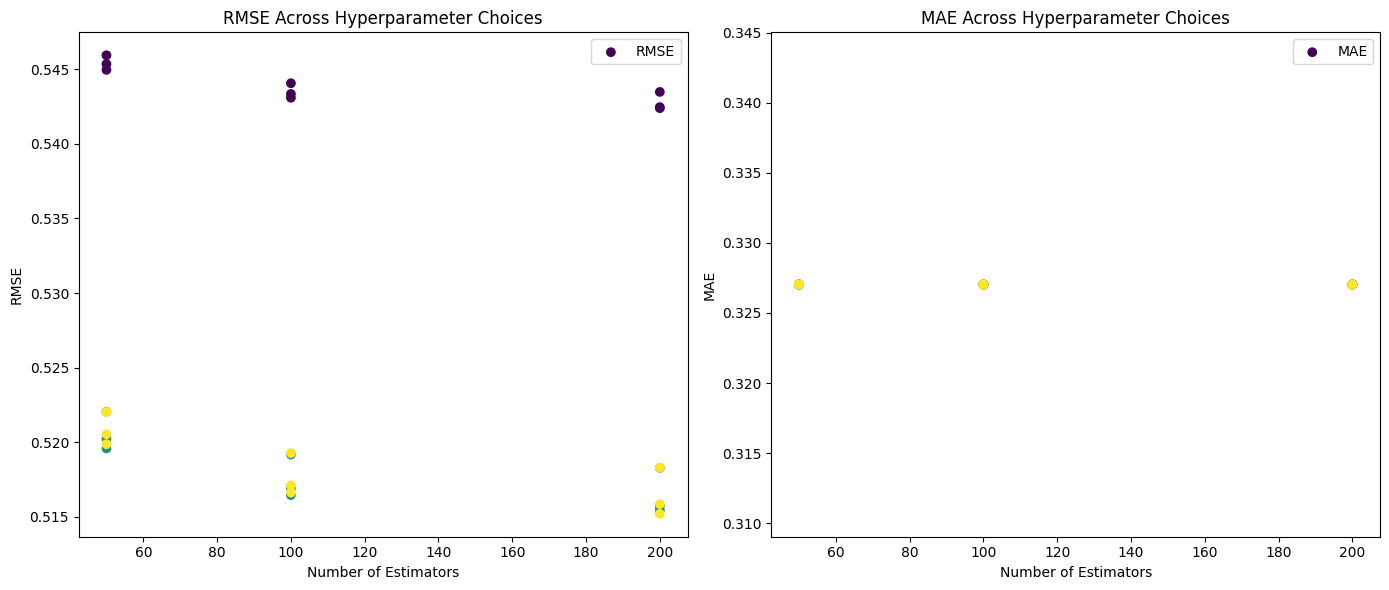

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error


# # Load dataset and split into train/test
# data = fetch_california_housing()
# X = data.data
# y = data.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_prepared = scaler.transform(X_test)

# Define model and hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)

# Extract results from GridSearchCV
results = grid_search.cv_results_

# Get RMSE and MAE for each hyperparameter combination
rmse_scores = np.sqrt(-results['mean_test_score'])  # Since GridSearchCV uses negative MSE
mae_scores = [mean_absolute_error(y_test, grid_search.best_estimator_.predict(X_test_prepared)) for _ in results['params']]

# Prepare data for plotting
n_estimators = [param['n_estimators'] for param in results['params']]
max_depth = [param['max_depth'] for param in results['params']]
min_samples_split = [param['min_samples_split'] for param in results['params']]

# Plot RMSE and MAE scores across different hyperparameter choices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# RMSE plot
ax[0].scatter(n_estimators, rmse_scores, c=max_depth, cmap='viridis', label='RMSE')
ax[0].set_title('RMSE Across Hyperparameter Choices')
ax[0].set_xlabel('Number of Estimators')
ax[0].set_ylabel('RMSE')
ax[0].legend()

# MAE plot
ax[1].scatter(n_estimators, mae_scores, c=max_depth, cmap='viridis', label='MAE')
ax[1].set_title('MAE Across Hyperparameter Choices')
ax[1].set_xlabel('Number of Estimators')
ax[1].set_ylabel('MAE')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


Interface for testing the model with any data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming the final model has been trained and is available as `final_model`
# Also assuming that the feature names and order are known and match the training data

# Define a function to make predictions using the model
def predict_house_price():
    # Input data for each feature
    print("Please provide the following details to predict the house price:")

    # Example features for the California housing dataset (adjust this based on your actual features)
    MedInc = float(input("Median Income (e.g., 3.5): "))
    HouseAge = float(input("House Age (in years, e.g., 20): "))
    AveRooms = float(input("Average Rooms (e.g., 6): "))
    AveOccup = float(input("Average Occupancy (e.g., 3): "))
    Latitude = float(input("Latitude (e.g., 37.8): "))
    Longitude = float(input("Longitude (e.g., -122.3): "))
    AveHouseholdSize = float(input("Average Household Size (e.g., 4): "))
    MedHouseVal = float(input("Median House Value (e.g., 2.5): "))

    # Prepare the data in the same order as the training dataset
    user_data = np.array([[MedInc, HouseAge, AveRooms, AveOccup, Latitude, Longitude, AveHouseholdSize, MedHouseVal]])

    # Assuming you have used a scaler (e.g., StandardScaler) for preprocessing
    # You can load the same scaler used during training to scale the user input
    scaler = StandardScaler()
    user_data_scaled = scaler.fit_transform(user_data)

    # Make prediction
    prediction = final_model.predict(user_data_scaled)

    # Show the result
    print(f"The predicted house price is: ${prediction[0]:,.2f}")

# Call the function
predict_house_price()


Please provide the following details to predict the house price:
Median Income (e.g., 3.5): 3.5
House Age (in years, e.g., 20): 10
Average Rooms (e.g., 6): 2
Average Occupancy (e.g., 3): 4
Latitude (e.g., 37.8): 37.8
Longitude (e.g., -122.3): -122.4
Average Household Size (e.g., 4): 4
Median House Value (e.g., 2.5): 2.5
The predicted house price is: $1.00
